In [4]:
import numpy as np 
import pandas as pd
import math 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

In [5]:
diamonds = pd.read_csv(r'C:\Users\ACER\Desktop\diamonds.csv')

In [6]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [8]:
#drop the unnamed column
diamonds = diamonds.drop("Unnamed: 0",axis = 1)
diamonds["price"] = diamonds["price"].astype("float64")

In [9]:
diamonds_cat = diamonds[["cut","color","clarity"]]
diamonds_cat.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [10]:
#encoding categorical data
cat_encoder = OneHotEncoder()
diamonds_cat_encoded = cat_encoder.fit_transform(diamonds_cat)
diamonds_cat_encoded.toarray()

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

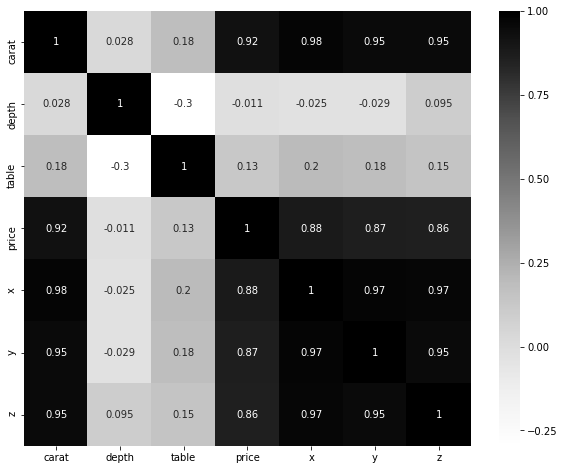

In [11]:
#correlation matrix to show relation between various fields
corr_matrix = diamonds.corr()
plt.subplots(figsize = (10,8))
ax=sns.heatmap(corr_matrix, annot = True, cmap = "Greys")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


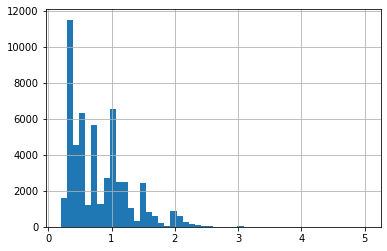

In [12]:
#splitting data into 20% test and 80% train
diamonds["carat"].hist(bins = 50)
plt.show()

In [13]:
diamonds["carat"].max()

5.01

In [14]:
diamonds["carat"].min()

0.2

In [15]:
diamonds["carat_cat"] = np.ceil(diamonds["carat"]/0.4)
diamonds["carat_cat"].where(diamonds["carat_cat"] < 5, 5.0, inplace = True)

In [16]:
diamonds["carat_cat"].value_counts()

2.0    17020
1.0    14391
3.0    13374
4.0     5907
5.0     3248
Name: carat_cat, dtype: int64

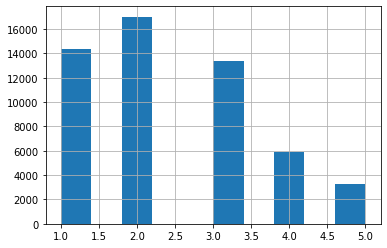

In [17]:
diamonds["carat_cat"].hist()

In [18]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in split.split(diamonds,diamonds["carat_cat"]):
    strat_train_set = diamonds.loc[train_index]
    strat_test_set = diamonds.loc[test_index]

In [19]:
strat_test_set["carat_cat"].value_counts() / len(strat_test_set)

2.0    0.315536
1.0    0.266778
3.0    0.247961
4.0    0.109473
5.0    0.060252
Name: carat_cat, dtype: float64

In [20]:
strat_test_set.describe()

,carat,depth,table,price,x,y,z,carat_cat
count,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
mean,0.797741,61.729329,57.480580,3956.750649,5.730093,5.734634,3.536117,2.380886
std,0.474259,1.430505,2.242666,4045.204490,1.123129,1.142879,0.697210,1.161875
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,1.000000
25%,0.400000,61.000000,56.000000,954.000000,4.710000,4.720000,2.910000,1.000000
50%,0.700000,61.800000,57.000000,2395.500000,5.700000,5.710000,3.530000,2.000000
75%,1.040000,62.500000,59.000000,5348.000000,6.530000,6.530000,4.030000,3.000000
max,5.010000,71.800000,73.000000,18804.000000,10.740000,31.800000,6.980000,5.000000


In [21]:
strat_train_set.describe()

,carat,depth,table,price,x,y,z,carat_cat
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797989,61.754424,57.451335,3926.811990,5.731423,5.734499,3.539388,2.380793
std,0.473955,1.433123,2.232430,3975.401149,1.121431,1.141962,0.707812,1.161765
min,0.200000,43.000000,44.000000,326.000000,0.000000,0.000000,0.000000,1.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,1.000000
50%,0.700000,61.800000,57.000000,2403.000000,5.700000,5.710000,3.520000,2.000000
75%,1.040000,62.500000,59.000000,5320.000000,6.540000,6.540000,4.040000,3.000000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,31.800000,5.000000


In [22]:
#data visualization
diamonds = strat_train_set.copy()

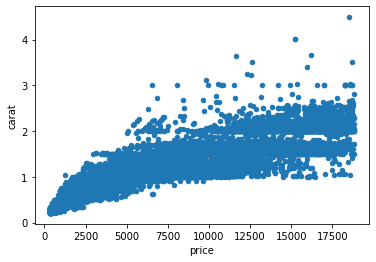

In [23]:
diamonds.plot(kind="scatter", x="price", y="carat")
plt.show()

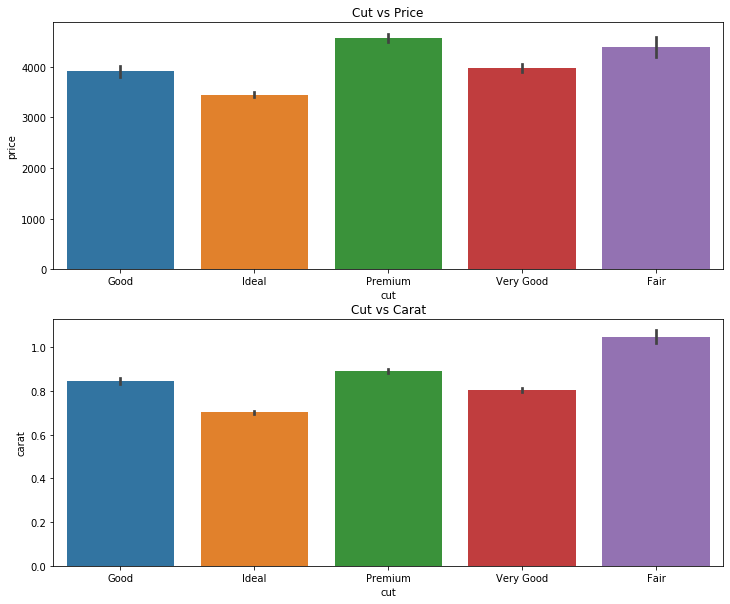

In [28]:
f, ax = plt.subplots(2,figsize = (12,10))
sns.barplot(x="cut",y="price",data = diamonds,ax=ax[0])
sns.barplot(x="cut",y="carat",data = diamonds, ax=ax[1])
ax[0].set_title("Cut vs Price")
ax[1].set_title("Cut vs Carat")
plt.show()



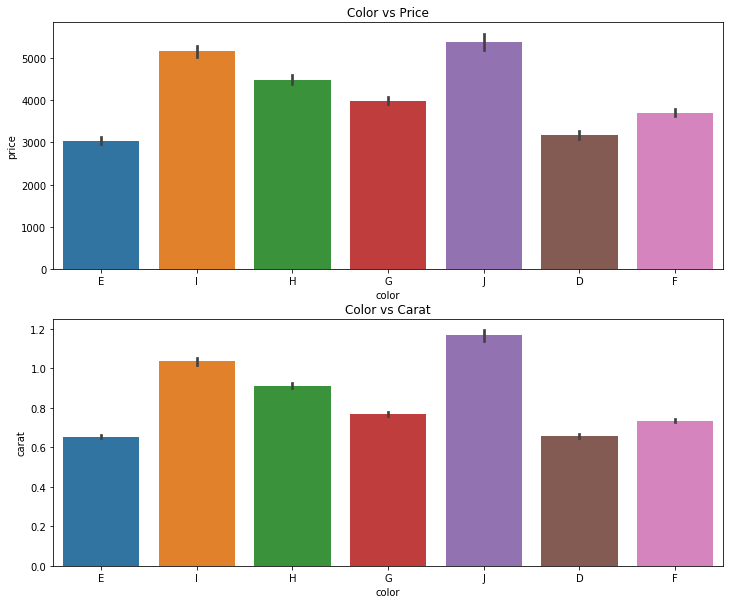

In [25]:
f, ax = plt.subplots(2,figsize = (12,10))
sns.barplot(x="color",y="price",data = diamonds,ax=ax[0])
sns.barplot(x="color",y="carat",data = diamonds, ax=ax[1])
ax[0].set_title("Color vs Price")
ax[1].set_title("Color vs Carat")
plt.show()

In [26]:
#preparing data for algorithm

In [23]:
headers = diamonds[diamonds.isnull().any(axis=1)].head()
headers

,carat,cut,color,clarity,depth,table,price,x,y,z,carat_cat


In [24]:
diamonds = strat_train_set.drop("price", axis=1)
diamonds_label = strat_train_set["price"].copy()
diamonds_only_num = diamonds.drop(["cut","clarity","color"],axis=1)
diamonds_only_num.head()

,carat,depth,table,x,y,z,carat_cat
5906,0.90,60.8,65.0,6.14,6.17,3.74,3.0
8859,1.13,61.4,56.0,6.69,6.71,4.12,3.0
50784,0.76,61.3,59.0,5.85,5.83,3.58,2.0
53587,0.80,62.0,59.0,5.91,5.96,3.68,2.0
24965,2.02,63.0,60.0,7.85,7.79,4.93,5.0


In [25]:
#Feature Scaling
#Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. 
#Therefore, it is necessary to feature scale all the features of diamond dataset. 
#There are two ways of doing feature scaling -min-max scaling and standardization. 
#I will be using standardization as it is not affected by any outliers.
std_scaler = StandardScaler()
diamonds_scaled_num = std_scaler.fit_transform(diamonds_only_num)

In [26]:
pd.DataFrame(diamonds_scaled_num).head()

,0,1,2,3,4,5,6
0,0.215235,-0.665983,3.381406,0.364339,0.381367,0.283429,0.532994
1,0.700519,-0.247312,-0.650122,0.854790,0.854242,0.820301,0.532994
2,-0.080155,-0.317090,0.693721,0.105738,0.083630,0.057378,-0.327775
3,0.004242,0.171359,0.693721,0.159242,0.197470,0.198660,-0.327775
4,2.578357,0.869144,1.141668,1.889194,1.799994,1.964687,2.254533


In [27]:
diamonds_cat = diamonds[["cut","color","clarity"]]
diamonds_cat.head()

,cut,color,clarity
5906,Good,E,SI1
8859,Ideal,I,SI2
50784,Premium,E,SI2
53587,Premium,H,SI1
24965,Premium,H,SI1


In [28]:

#Transformation Pipeline
#We have to perform feature scaling and label encoding on dataset before feeding it into ML algorithms. 
#So, to simplify the process we will create a pipeline using ColumnTransformer which successively performs feature scaling
#and Label encoding.

from sklearn.compose import ColumnTransformer

num_attribs = list(diamonds_only_num)
cat_attribs = ["cut","color","clarity"]
pipeline = ColumnTransformer([
    ("num", StandardScaler(),num_attribs),
    ("cat",OneHotEncoder(),cat_attribs),
])

diamonds_prepared = pipeline.fit_transform(diamonds)

In [29]:
diamonds_prepared

array([[ 0.2152352 , -0.66598281,  3.38140637, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.70051919, -0.24731173, -0.65012193, ...,  0.        ,
         0.        ,  0.        ],
       [-0.08015506, -0.31709024,  0.69372084, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.56543906,  1.14825855, -1.09806952, ...,  1.        ,
         0.        ,  0.        ],
       [-0.20675088,  1.00870152, -1.09806952, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.44732754,  0.79936598,  0.24577325, ...,  0.        ,
         0.        ,  0.        ]])

In [30]:
pd.DataFrame(diamonds_prepared).head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.215235,-0.665983,3.381406,0.364339,0.381367,0.283429,0.532994,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.700519,-0.247312,-0.650122,0.854790,0.854242,0.820301,0.532994,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.080155,-0.317090,0.693721,0.105738,0.083630,0.057378,-0.327775,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.004242,0.171359,0.693721,0.159242,0.197470,0.198660,-0.327775,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2.578357,0.869144,1.141668,1.889194,1.799994,1.964687,2.254533,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [31]:
diamonds_prepared.shape

(43152, 27)

In [34]:

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from random import randint

X_test = strat_test_set.drop("price",axis=1)
y_test = strat_test_set["price"].copy()

model_name = []
rmse_train_scores = []
cv_rmse_scores = []
accuracy_models = []
rmse_test_scores = []

def model_performance(modelname,model,diamonds = diamonds_prepared, diamonds_labels = diamonds_label,
                      X_test = X_test,y_test = y_test,
                      pipeline=pipeline, cv = True):
    
    model_name.append(modelname)
    
    model.fit(diamonds,diamonds_labels)
    
    predictions = model.predict(diamonds)
    mse_train_score = mean_squared_error(diamonds_labels, predictions)
    rmse_train_score = np.sqrt(mse_train_score)
    cv_rmse = np.sqrt(-cross_val_score(model,diamonds,diamonds_labels,
                                       scoring = "neg_mean_squared_error",cv=10))
    cv_rmse_mean = cv_rmse.mean()
    
    print("RMSE_Train: %.4f" %rmse_train_score)
    rmse_train_scores.append(rmse_train_score)
    print("CV_RMSE: %.4f" %cv_rmse_mean)
    cv_rmse_scores.append(cv_rmse_mean)
    
    
    print("---------------------TEST-------------------")
    
    X_test_prepared = pipeline.transform(X_test)
    
    test_predictions = model.predict(X_test_prepared)
    mse_score = mean_squared_error(y_test,test_predictions)
    rmse_score = np.sqrt(mse_score)
    
    print("RMSE_Test: %.4f" %rmse_score)
    rmse_test_scores.append(rmse_score)
    
    accuracy = (model.score(X_test_prepared,y_test)*100)
    print("accuracy: "+ str(accuracy) + "%")
    accuracy_models.append(accuracy)
    
    start = randint(1, len(y_test))
    some_data = X_test.iloc[start:start + 5]
    some_labels = y_test.iloc[start:start + 5]
    some_data_prepared = pipeline.transform(some_data)
    print("Predictions:", model.predict(some_data_prepared))
    print("Labels:    :", list(some_labels))
    
    
    plt.scatter(y_test,test_predictions)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    x_lim = plt.xlim()
    y_lim = plt.ylim()
    plt.plot(x_lim, y_lim, "go--")
    plt.show()

RMSE_Train: 1701.7975
CV_RMSE: 1703.1037
---------------------TEST-------------------
RMSE_Test: 1761.2141
accuracy: 81.04238804795362%
Predictions: [1979.53319838 1428.23668833 3044.79220726 3237.94930173 6726.56823853]
Labels:    : [847.0, 969.0, 1648.0, 2098.0, 7560.0]


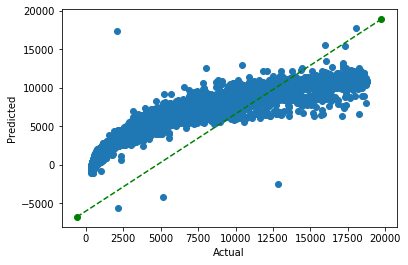

In [35]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(normalize = True)
model_performance("Ridge Regression",ridge_reg)

RMSE_Train: 1400.2715
CV_RMSE: 1385.3847
---------------------TEST-------------------
RMSE_Test: 1454.5329
accuracy: 87.06976530602594%
Predictions: [5654.71504206 4759.04665149 9294.96234891 5333.67796001 5654.71504206]
Labels:    : [4984.0, 3950.0, 9645.0, 4851.0, 5840.0]


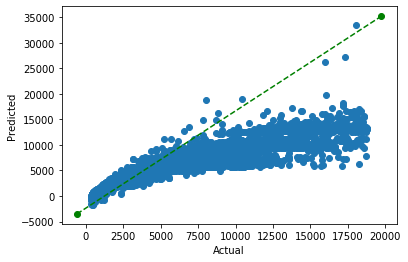

In [36]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(normalize = True)
model_performance("Lasso Regression",lasso_reg)

RMSE_Train: 1122.2854
CV_RMSE: 1123.8668
---------------------TEST-------------------
RMSE_Test: 1167.9409
accuracy: 91.66316770289436%
Predictions: [4798. 1328. 1418. 3950. 3758.]
Labels:    : [4504.0, 780.0, 936.0, 4475.0, 4288.0]


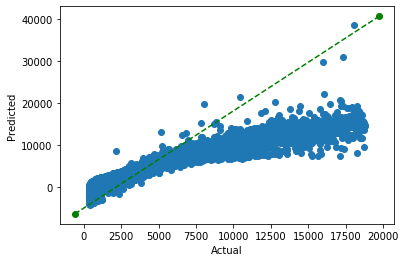

In [37]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression(normalize=True)
model_performance("Linear Regression",linear_reg)

RMSE_Train: 9.2835
CV_RMSE: 753.1083
---------------------TEST-------------------
RMSE_Test: 758.6286
accuracy: 96.48263251158028%
Predictions: [ 1784.  3053. 10572.  3710.   730.]
Labels:    : [2287.0, 3197.0, 9999.0, 2726.0, 752.0]


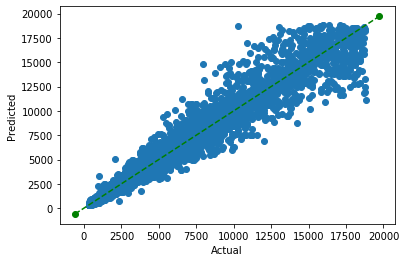

In [38]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(random_state=42)
model_performance("Decision Tree Regression",decision_tree)

RMSE_Train: 239.4409
CV_RMSE: 577.1565
---------------------TEST-------------------
RMSE_Test: 581.9054
accuracy: 97.93050630491946%
Predictions: [ 923.7  680.9  802.  1124.2 3674.6]
Labels:    : [898.0, 671.0, 802.0, 983.0, 3907.0]


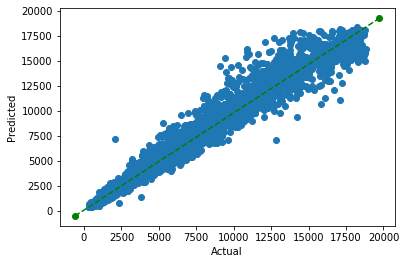

In [39]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators = 10, random_state = 40)
model_performance("Random Forest Regression",forest_reg)

RMSE_Train: 1686.3027
CV_RMSE: 1687.4838
---------------------TEST-------------------
RMSE_Test: 1741.7077
accuracy: 81.45999485578443%
Predictions: [  97.04909728 2080.38981173 5148.61208745 8730.56197508 7843.66503598]
Labels:    : [665.0, 1343.0, 1901.0, 13623.0, 6086.0]


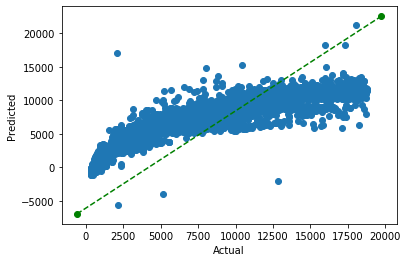

In [40]:
from sklearn.linear_model import ElasticNet

net_reg = ElasticNet()
model_performance("Elastic Net Regression",net_reg)

RMSE_Train: 1568.0537
CV_RMSE: 1529.3845
---------------------TEST-------------------
RMSE_Test: 1585.5176
accuracy: 84.63610216280658%
Predictions: [1370.06662437 3835.35045193 3832.60785141 7420.69231635 3832.60785141]
Labels:    : [485.0, 4889.0, 2724.0, 5080.0, 3692.0]


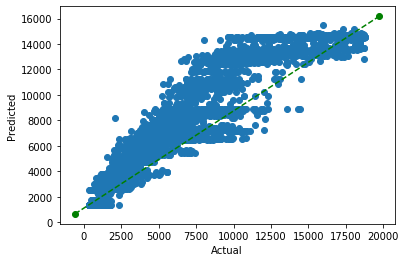

In [41]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(n_estimators = 100)
model_performance("Ada Boost Regression",ada_reg)

RMSE_Train: 1228.6672
CV_RMSE: 1235.8964
---------------------TEST-------------------
RMSE_Test: 1268.8257
accuracy: 90.16072185956554%
Predictions: [ 1848.83198872  1025.66440211   432.21742403  2498.82847784
 14878.73908373]
Labels:    : [1999.0, 1061.0, 765.0, 2525.0, 18426.0]


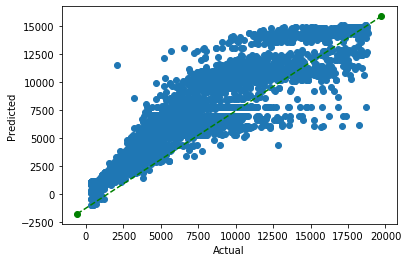

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

grad_reg = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1,
                                     max_depth = 1, random_state = 42, loss = 'ls')
model_performance("Gradient Boosting Regression",grad_reg)

In [43]:

compare_models = pd.DataFrame({"Algorithms" : model_name, "Models RMSE" : rmse_test_scores, 
                               "CV RMSE Mean" : cv_rmse_scores, "Accuracy" : accuracy_models})
compare_models.sort_values(by = "Accuracy", ascending=False)

,Algorithms,Models RMSE,CV RMSE Mean,Accuracy
4,Random Forest Regression,581.905423,577.156453,97.930506
3,Decision Tree Regression,758.628621,753.108300,96.482633
2,Linear Regression,1167.940945,1123.866801,91.663168
7,Gradient Boosting Regression,1268.825709,1235.896393,90.160722
1,Lasso Regression,1454.532920,1385.384709,87.069765
6,Ada Boost Regression,1585.517560,1529.384461,84.636102
5,Elastic Net Regression,1741.707718,1687.483841,81.459995
0,Ridge Regression,1761.214149,1703.103675,81.042388


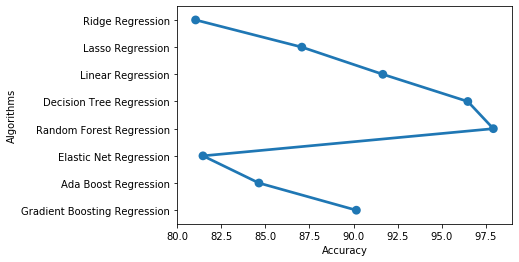

In [45]:
sns.pointplot("Accuracy","Algorithms",data=pd.DataFrame({'Algorithms':model_name,"Accuracy":accuracy_models}))
